## Optimization methods

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


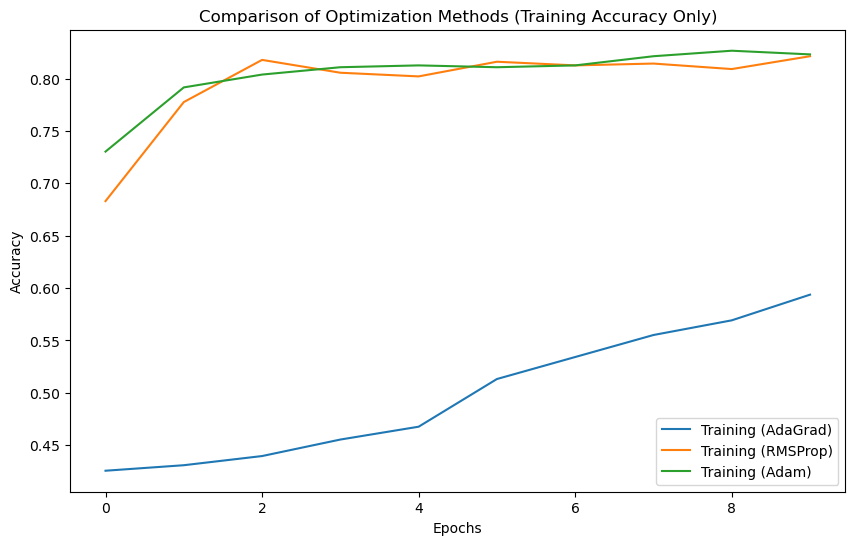

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Passenger 1: Predicted Survival = 0, Actual = 0
Passenger 2: Predicted Survival = 1, Actual = 1
Passenger 3: Predicted Survival = 1, Actual = 1
Passenger 4: Predicted Survival = 1, Actual = 1
Passenger 5: Predicted Survival = 0, Actual = 0
Passenger 6: Predicted Survival = 1, Actual = 1
Passenger 7: Predicted Survival = 0, Actual = 1
Passenger 8: Predicted Survival = 0, Actual = 1
Passenger 9: Predicted Survival = 1, Actual = 0
Passenger 10: Predicted Survival = 1, Actual = 0


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess data
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
df = df[features + ["Survived"]].dropna()
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
X = df[features].values
y = df["Survived"].values
X = StandardScaler().fit_transform(X)

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train and evaluate model with different optimizers
def train_model(optimizer, optimizer_name):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, verbose=0)  # Removed validation_data
    
    # Plot training accuracy only
    plt.plot(history.history['accuracy'], label=f'Training ({optimizer_name})')

# Train and plot results for different optimizers
plt.figure(figsize=(10, 6))
train_model(tf.keras.optimizers.Adagrad(), "AdaGrad")
train_model(tf.keras.optimizers.RMSprop(), "RMSProp")
train_model(tf.keras.optimizers.Adam(), "Adam")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of Optimization Methods (Training Accuracy Only)')
plt.show()

# Make predictions using Adam optimizer (best general-purpose choice)
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, verbose=0)

# Visualize predictions
predictions = (model.predict(x_test[:10]) > 0.5).astype(int).flatten()

for i in range(10):
    print(f'Passenger {i+1}: Predicted Survival = {predictions[i]}, Actual = {y_test[i]}')
